## To Run
- Adjust Mod Free and Mod fix Paths

TO DO: 

- length (1980-2009 / 29 years) of time is still hard coded


# Experiments: 
    -Free Running: 
        -/glade/campaign/cisl/aiml/wchapman/CAM_runs/f.e21.DAcompset.f09_d025_free_MJO_1982
        - path_tofiles=/glade/campaign/cisl/aiml/wchapman/CAM_runs/' + modvers + '/atm/hist/*h1*.nc
    -Nudge No Stochai: 
        -/glade/scratch/wchapman/archive/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982
    -Nudge Stochai
        -/glade/scratch/wchapman/archive/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_05_1982_MJO_v3
        - path_tofiles='/glade/scratch/wchapman/archive/' + modvers + '/atm/hist/*h1*.nc'
    -DA No Stochai: 
        -/glade/scratch/wchapman/archive/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_00_1982
    -DA Stochai
        -/glade/scratch/wchapman/archive/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_05_1982/
    -obs
        -/glade/scratch/wchapman/TEMPERAI/

In [1]:
#Path to ADF files
mod_free = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_free_MJO_1982/ts/f.e21.DAcompset.f09_d025_free_MJO_1982.h0.Z3.plevs.198201-201012.nc'
mod_fix = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_05_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_05_1982.h0.Z3.plevs.198201-201012.nc'
# mod_fix = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_00_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_00_1982.h0.Z3.plevs.198201-201012.nc'
# mod_fix = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982.h0.Z3.plevs.198201-201012.nc'
# mod_fix = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_05_1982_MJO_v3/ts/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_05_1982_MJO_v3.h0.Z3.plevs.198201-201012.nc'


In [2]:
import xarray as xr
import numpy as np
import numpy.ma as ma
import pandas as pd
import glob
import scipy
import copy
import math
import time
import random
from scipy import stats

##### plotting with Cartopy. 
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import ticker
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
######

from datetime import datetime
import os
import importlib

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from shapely.geometry.polygon import LinearRing
from dask.diagnostics import ProgressBar
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import math
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import geocat.comp as gcomp
import shutil
import metpy.calc as mpcalc
from eofs.xarray import Eof

In [8]:
if 'client' in locals():
    client.shutdown()
    print('...shutdown client...')
else:
    print('client does not exist yet')

/glade/u/apps/opt/conda/envs/npl-2023a/lib/python3.9/site-packages/dask_jobqueue/core.py:255: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/u/apps/opt/conda/envs/npl-2023a/lib/python3.9/site-packages/dask_jobqueue/core.py:274: FutureWarning: env_extra has been renamed to job_script_prologue. You are still using it (even if only set to []; please also check config files). If you did not set job_script_prologue yet, env_extra will be respected for now, but it will be removed in a future release. If you already set job_script_prologue, env_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/u/apps/opt/conda

...shutdown client...


## Dask

In [4]:
print('This is needed for the Large Ensemble')
from distributed import Client
from ncar_jobqueue import NCARCluster

cluster = NCARCluster(project='P54048000',walltime='06:00:00')
cluster.scale(40)
client = Client(cluster)
client

This is needed for the Large Ensemble


/glade/u/apps/opt/conda/envs/npl-2023a/lib/python3.9/site-packages/dask_jobqueue/core.py:255: FutureWarning: job_extra has been renamed to job_extra_directives. You are still using it (even if only set to []; please also check config files). If you did not set job_extra_directives yet, job_extra will be respected for now, but it will be removed in a future release. If you already set job_extra_directives, job_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/u/apps/opt/conda/envs/npl-2023a/lib/python3.9/site-packages/dask_jobqueue/core.py:274: FutureWarning: env_extra has been renamed to job_script_prologue. You are still using it (even if only set to []; please also check config files). If you did not set job_script_prologue yet, env_extra will be respected for now, but it will be removed in a future release. If you already set job_script_prologue, env_extra is ignored and you can remove it.
  warnings.warn(warn, FutureWarning)
/glade/u/apps/opt/conda

<Client: 'tcp://10.12.206.53:41514' processes=0 threads=0, memory=0 B>

## Functions

In [5]:
def is_mon(month,monget):
    return (month == monget)

def Seas_Avg_TS(DS,var,numav):
    Seas_Avg = xr.zeros_like(DS)
    np_seasav = np.zeros_like(DS[var])
    for ii in range(len(DS['time'])):     
        if ii+numav > len(DS['time']):
            np_seasav[ii,:,:] = np.nan
        else:
            dingo  = DS.isel(time=slice(ii,ii+numav)) 
            month_length = dingo.time.dt.days_in_month
            scaling = month_length / np.sum(month_length)
            np_seasav[ii,:,:] = (dingo[var] * scaling).sum(['time'])
    Seas_Avg[var].values=np_seasav
    Seas_Avg=Seas_Avg.dropna(dim='time')
    return Seas_Avg


def fix_EOF(C_for,Pats):
    # Pats = ['NAM','SAM','PNA','NPO','NAO','PSA1','PSA2']
    C_for_rep = xr.zeros_like(C_for)

    # EOF_fix(Pats)
    for Pt in Pats:
        print(Pt)
        if Pt == 'PNA':
            latdo = [30,75]
            londo = [180,220]

        if Pt == 'NPO':
            latdo = [60,89]
            londo = [0,360]

        if Pt == 'NAM':
            latdo = [60,89]
            londo = [0,360]

        if Pt == 'SAM':
            latdo = [-89,-60]
            londo = [0,360]

        if Pt == 'PSA1':
            latdo = [-89,-60]
            londo = [0,360]

        if Pt == 'PSA2':
            latdo = [-89,-60]
            londo = [0,360]

        if Pt == 'NAO':
            latdo = [60,89]
            londo = [0,360]
        Replace_EOF = np.zeros_like(C_for[Pt])
        Replace_PC  = np.zeros_like(C_for[Pt+'_PC'])
        for ii in range(len(C_for['member'])):
            if np.sum(C_for[Pt].sel(member=ii).sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))).values > 0:
                Replace_EOF[ii,:,:] = C_for[Pt].sel(member=ii).values*-1
                Replace_PC[ii,:] = C_for[Pt+'_PC'].sel(member=ii).values*-1     
            else:
                Replace_EOF[ii,:,:] = C_for[Pt].sel(member=ii).values
                Replace_PC[ii,:] = C_for[Pt+'_PC'].sel(member=ii).values

        C_for_rep[Pt].values = Replace_EOF
        C_for_rep[Pt+'_PC'].values = Replace_PC
        C_for_rep[Pt+'_var_frac'].values = C_for[Pt+'_var_frac'].values
        C_for_rep[Pt+'_tot_var'].values = C_for[Pt+'_tot_var'].values
    return C_for_rep

## Params

# Start Here!!!!!

## Large Ensemble

In [6]:
%%time

PATStot = ['PNA','NPO','NAO','NAM']
for pattern_doing in PATStot:
    run_this = False
    dir_path = '/glade/scratch/wchapman/Z500_LE/'
    Yuk=len([entry for entry in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, entry))])
    if Yuk<30:
        run_this= True
    else:
        print('File count in Folder: ', Yuk)
    season = 'DJF'
    fil_LE_Patterns = '/glade/work/wchapman/DA_ML/data_handling/Random_Data/Patterns_'+season+'_Z500_LE_'+pattern_doing+'_spread_1980_2010.nc'

    if run_this:
        print('FUUCKKKK no files exist... be prepared to wait....')
        fn = sorted(glob.glob('/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/Z3/*LE2*198*.nc'))
        fn1 = sorted(glob.glob('/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/Z3/*LE2*199*.nc'))
        fn2 = sorted(glob.glob('/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/Z3/*LE2*2000*.nc'))
        fn_PS = sorted(glob.glob('/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/PS/*LE2*198*.nc'))
        fn1_PS = sorted(glob.glob('/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/PS/*LE2*199*.nc'))
        fn2_PS = sorted(glob.glob('/glade/campaign/cgd/cesm/CESM2-LE/timeseries/atm/proc/tseries/month_1/PS/*LE2*2000*.nc'))
        Num_ENSE=100
        for ense_r in range(0,Num_ENSE):
            if ense_r % 1==0:
                print('doing member:', ense_r)

             # DS = xr.open_mfdataset([fn[ense_r],fn1[ense_r],fn2[ense_r]]).load()

            DS = xr.open_mfdataset([fn[ense_r],fn1[ense_r],fn2[ense_r]],parallel=True)
            DS_PS = xr.open_mfdataset([fn_PS[ense_r],fn1_PS[ense_r],fn2_PS[ense_r]],parallel=True)

            DS_chunked = DS.chunk({'time':10, 'lat':192, 'lon':288})
            DS_PS_chunked = DS_PS.chunk({'time':10, 'lat':192, 'lon':288})

            new_levs = np.array([3, 7, 20, 30, 50, 70, 100, 125, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 850, 900, 925, 950, 975, 1000])*100 #mb
            print('interp')
            Udat = gcomp.interpolation.interp_hybrid_to_pressure(DS_chunked['Z3'],DS_PS_chunked['PS'],DS_chunked['hyam'],DS_chunked['hybm'],100000.,new_levels=new_levs).persist()
            Udat = Udat.to_dataset(name='Z3')
            Udat = Udat.rename({"plev": "lev"})
            Udat["lev"] = Udat["lev"] / 100.0
            Udat = Udat.sel(lev=500)
            Udat = Udat.load()
            DS=Udat


            latshape=len(DS['lat'])
            lonshape=len(DS['lon'])

            DS['time'] = pd.date_range(start='1980-01-01',end='2009-12-01',freq='MS') #need to make this general...
            DS.to_netcdf('/glade/scratch/wchapman/Z500_LE/'+fn[ense_r].split('/Z3/')[-1].split('.Z3.')[0]+'.Z3.198001-200912.nc')
            # break

    ##check if patterns exist:::
    if not os.path.exists(fil_LE_Patterns): 
        Pats = [pattern_doing]
        Num_ENSE=100
        fn = sorted(glob.glob('/glade/scratch/wchapman/Z500_LE/*.nc'))
        DS = xr.open_dataset(fn[0]).load()          
        latshape=len(DS['lat'])
        lonshape=len(DS['lon'])


        print('doing patterns')
        for ee,pattern in enumerate(Pats):
            print('doing pattern: ',pattern)
            #modes defined here: https://opensky.ucar.edu/islandora/object/manuscripts:1001
            if pattern == 'PNA':
                latdo = [20,85]
                londo = [120,240]
                getmode=0

            if pattern == 'NPO':
                latdo = [20,85]
                londo = [120,240]
                getmode=1

            if pattern == 'NAM':
                latdo = [20,89]
                londo = [0,360]
                getmode=0

            if pattern == 'SAM':
                latdo = [-89,-20]
                londo = [0,360]
                getmode=0

            if pattern == 'PSA1':
                latdo = [-89,-20]
                londo = [0,360]
                getmode=1

            if pattern == 'PSA2':
                latdo = [-89,-20]
                londo = [0,360]
                getmode=2

            if pattern == 'NAO':
                latdo = [20,80]
                londo = [-90,40]
                getmode=0


            #cosine weighting and take EOF ... of region...
            if pattern in ['NAM','SAM','PNA','NPO','PSA1','PSA2']:
                DS_reg_temp = DS.sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

            elif pattern == "NAO":
                DS_reg_temp = copy.deepcopy(DS)
                DS_reg_temp.coords['lon'] = (DS_reg_temp.coords['lon'] + 180) % 360 - 180
                DS_reg_temp = DS_reg_temp.sortby(DS_reg_temp.lon).sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

            latshape_reg=len(DS_reg_temp['lat'])
            lonshape_reg=len(DS_reg_temp['lon'])


            mon_dict = {'DJF':[3,12],'MAM':[3,3],'JJA':[3,6],'SON':[3,9],'ANN':[12,1]}
            mon_retrieve = mon_dict[season][1]
            roll_num = mon_dict[season][0]

            fullpat = np.zeros([Num_ENSE,latshape,lonshape])
            fullpc = np.zeros([Num_ENSE,90])
            var_exp = np.zeros([Num_ENSE])

            full_Recon_pattern = np.zeros([Num_ENSE,latshape_reg,lonshape_reg])

            for ense_r in range(0,Num_ENSE):
                if ense_r % 1==0:
                    print('doing member:', ense_r)

                DS = xr.open_dataset(fn[ense_r]).load()
                latshape=len(DS['lat'])
                lonshape=len(DS['lon'])

                DS['time'] = pd.date_range(start='1980-01-01',end='2009-12-01',freq='MS') #need to make this general...

                DS_roll = Seas_Avg_TS(DS,'Z3',1)
                #create seasons...
                DS_D = DS_roll.sel(time=is_mon(DS_roll['time.month'],12))
                #remove mean 
                DS_D = DS_D - DS_D.mean('time')
                DS_J = DS_roll.sel(time=is_mon(DS_roll['time.month'],1))
                DS_J = DS_J - DS_J.mean('time')
                DS_F = DS_roll.sel(time=is_mon(DS_roll['time.month'],2))
                DS_F = DS_F - DS_F.mean('time')
                DS_SEA = xr.merge([DS_D,DS_J,DS_F])['Z3']

                #create seasons...
                # DS_SEA = DS_roll.sel(time=is_mon(DS_roll['time.month'],mon_retrieve))['Z3']

                #cosine weighting and take EOF ... of region...
                if pattern in ['NAM','SAM','PNA','NPO','PSA1','PSA2']:
                    DA_do = DS_SEA.sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

                elif pattern == "NAO":
                    DA_do = copy.deepcopy(DS_SEA)
                    DA_do.coords['lon'] = (DS_SEA.coords['lon'] + 180) % 360 - 180
                    DA_do = DA_do.sortby(DA_do.lon).sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))


                coslat = np.cos(np.deg2rad(DA_do.coords['lat'].values))
                wgts = np.sqrt(coslat)[..., np.newaxis]
                solver = Eof(DA_do, weights=wgts,center=False)
                pc1 = solver.pcs(npcs=10, pcscaling=1).sel(mode=getmode)

                #solve the regression problem as a covariance problem.... 
                bb = ma.dot((DS_SEA).stack(allpoints=['lat','lon']).T,pc1)/(len(pc1)-1)
                patdone = bb.reshape([latshape,lonshape])


                fullpat[ense_r,:,:] = patdone
                fullpc[ense_r,:] = np.array(pc1).squeeze()
                var_exp[ense_r] = np.array(solver.varianceFraction(neigs=10))[getmode]

                ##reconstruction
                Recon_pattern = solver.reconstructedField(neofs=[getmode+1])
                Recon_pattern_var = Recon_pattern.var('time') 
                full_Recon_pattern[ense_r,:,:]=Recon_pattern_var


            #this is your dataset:  
            if ee==0:
                C_for = xr.Dataset(
                    {
                        pattern: (["member","lat", "lon"],fullpat),    
                        pattern+"_PC": (["member","time"],np.array(fullpc).squeeze()), 
                        pattern+"_var_frac":(["member"],var_exp.squeeze()),
                        pattern+"_tot_var":(["member","lat_reg","lon_reg"],full_Recon_pattern.squeeze()),
                    },
                    coords={
                        "member":np.arange(0,Num_ENSE),
                        "lat":np.array(DS['lat']),
                        "lon":np.array(DS['lon']),
                        "lat_reg":np.array(Recon_pattern_var['lat']),
                        "lon_reg":np.array(Recon_pattern_var['lon']),
                        "time":pc1['time'].data[:],
                    },)
                C_for.attrs["title"] = "EOFs of member"
                C_for[pattern].attrs['units'] = 'PA'
                C_for[pattern].attrs['standard_name']='Pattern Regressed on PC scaled to unit variance '
                C_for[pattern+"_PC"].attrs['standard_name']='PC scaled to unit variance '

            #this is your dataset:  
            else:
                C_temp = xr.Dataset(
                    {
                        pattern: (["member","lat", "lon"],fullpat),    
                        pattern+"_PC": (["member","time"],np.array(fullpc).squeeze()), 
                        pattern+"_var_frac":(["member"],var_exp.squeeze()),
                        pattern+"_tot_var":(["member","lat_reg","lon_reg"],full_Recon_pattern.squeeze()),
                    },
                    coords={
                        "member":np.arange(0,Num_ENSE),
                        "lat":np.array(DS['lat']),
                        "lon":np.array(DS['lon']),
                        "time":pc1['time'].data[:],
                        "lat_reg":np.array(Recon_pattern_var['lat']),
                        "lon_reg":np.array(Recon_pattern_var['lon']),
                    },)
                C_temp.attrs["title"] = "EOFs of member"
                C_temp[pattern].attrs['units'] = 'PA'
                C_temp[pattern].attrs['standard_name']='Pattern Regressed on PC scaled to unit variance '
                C_temp[pattern+"_PC"].attrs['standard_name']='PC scaled to unit variance '
                print('...merging...')
                C_for = xr.merge([C_for,C_temp])

            ### 
            memno=2 #member to plot...
            print('plotting member: ', memno)
            if pattern in ['NAM','NAO','PNA','NPO']:
                Max_Pascal=60
                cmap = plt.colormaps['PiYG']
                levels = MaxNLocator(nbins=25).tick_values(-Max_Pascal,Max_Pascal)
                norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

                fig = plt.figure(figsize=[10, 5])
                ax1 = fig.add_subplot(111, projection=ccrs.NorthPolarStereo())
                lat = C_for['lat']
                lon = C_for['lon']
                plotter = C_for[pattern].sel(member=memno)
                cs2=ax1.pcolormesh(lon,lat,plotter,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
                ax1.set_extent([-180, 180, 10, 90], crs=ccrs.PlateCarree())
                ax1.coastlines()
                plt.colorbar(cs2)
                plt.show()

            if pattern in ['SAM','PSA1','PSA2']:
                Max_Pascal=60
                cmap = plt.colormaps['PiYG']
                levels = MaxNLocator(nbins=25).tick_values(-Max_Pascal,Max_Pascal)
                norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

                fig = plt.figure(figsize=[10, 5])
                ax1 = fig.add_subplot(111, projection=ccrs.SouthPolarStereo())
                lat = C_for['lat']
                lon = C_for['lon']
                plotter = C_for[pattern].sel(member=memno)
                cs2=ax1.pcolormesh(lon,lat,plotter,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
                ax1.set_extent([-180, 180, -10, -90], crs=ccrs.PlateCarree())
                ax1.coastlines()
                plt.colorbar(cs2)
                plt.show()        
        C_for.to_netcdf(fil_LE_Patterns)
    else: 
        print('file exists!')
        C_for = xr.open_dataset(fil_LE_Patterns)
    C_for

File count in Folder:  100
file exists!
File count in Folder:  100
file exists!
File count in Folder:  100
file exists!
File count in Folder:  100
file exists!
CPU times: user 103 ms, sys: 20.9 ms, total: 124 ms
Wall time: 660 ms


## Get Free Model Patterns

doing:  /glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_free_MJO_1982/ts/f.e21.DAcompset.f09_d025_free_MJO_1982.h0.Z3.plevs.198201-201012.nc
doing pattern:  NPO
doing member: 0
plotting member:  0


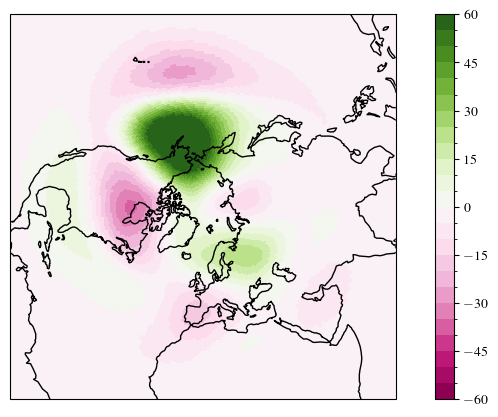

done..done...done..
doing:  /glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_free_MJO_1982/ts/f.e21.DAcompset.f09_d025_free_MJO_1982.h0.Z3.plevs.198201-201012.nc
doing pattern:  NAO
doing member: 0
plotting member:  0


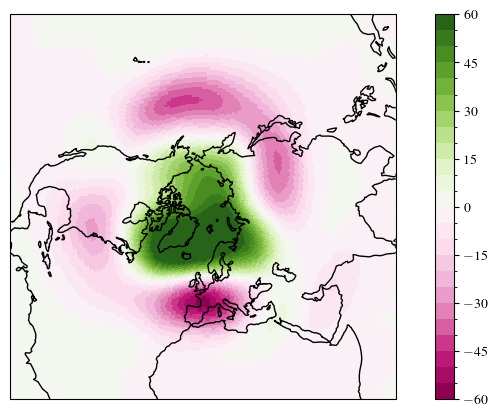

done..done...done..
doing:  /glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_free_MJO_1982/ts/f.e21.DAcompset.f09_d025_free_MJO_1982.h0.Z3.plevs.198201-201012.nc
doing pattern:  NAM
doing member: 0
plotting member:  0


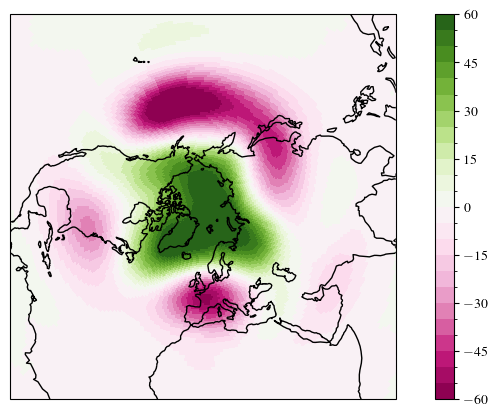

done..done...done..
doing:  /glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_free_MJO_1982/ts/f.e21.DAcompset.f09_d025_free_MJO_1982.h0.Z3.plevs.198201-201012.nc
doing pattern:  PNA
doing member: 0
plotting member:  0


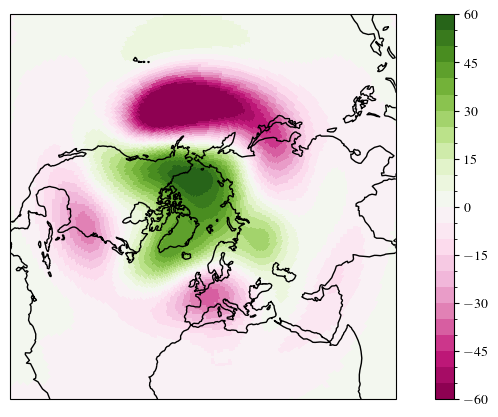

done..done...done..
CPU times: user 20.7 s, sys: 1.4 s, total: 22.1 s
Wall time: 43.9 s


In [7]:
%%time
Patssave = ['NPO','NAO','NAM','PNA']
for Pats in Patssave:
    Pats = [Pats]
    Num_ENSE=2
    years_st='1982'
    years_en='2010'

    mon_dict = {'DJF':[3,12],'MAM':[3,3],'JJA':[3,6],'SON':[3,9],'ANN':[12,1]}
    mon_retrieve = mon_dict[season][1]
    roll_num = mon_dict[season][0]
    print('doing: ',mod_free)
    ERAi = xr.open_dataset(mod_free).sel(lev=500)
    ##fix time... 
    #re-align time...
    ERAi['time'] = pd.date_range(start=years_st+'-01-01',end=years_en+'-12-01',freq='MS')
    ERAi = ERAi.sel(time=slice(years_st+'-01-01',years_en+'-12-01'))
    # ERAi = ERAi['PSL'].rolling(time=roll_num).mean()

    DS_roll = Seas_Avg_TS(ERAi,'Z3',1)
    #create seasons...
    DS_D = DS_roll.sel(time=is_mon(DS_roll['time.month'],12))
    #remove mean 
    DS_D = DS_D - DS_D.mean('time')
    DS_J = DS_roll.sel(time=is_mon(DS_roll['time.month'],1))
    DS_J = DS_J - DS_J.mean('time')
    DS_F = DS_roll.sel(time=is_mon(DS_roll['time.month'],2))
    DS_F = DS_F - DS_F.mean('time')
    DS_SEA = xr.merge([DS_D,DS_J,DS_F])['Z3']

    latshape=len(DS_SEA['lat'])
    lonshape=len(DS_SEA['lon'])
    subsel = np.arange(0,len(DS_SEA['time']))

    for ee,pattern in enumerate(Pats):
        print('doing pattern: ',pattern)
        #modes defined here: https://opensky.ucar.edu/islandora/object/manuscripts:1001
        if pattern == 'PNA':
            latdo = [20,85]
            londo = [120,240]
            getmode=0

        if pattern == 'NPO':
            latdo = [20,85]
            londo = [120,240]
            getmode=1

        if pattern == 'NAM':
            latdo = [20,89]
            londo = [0,360]
            getmode=0

        if pattern == 'SAM':
            latdo = [-89,-20]
            londo = [0,360]
            getmode=0

        if pattern == 'PSA1':
            latdo = [-89,-20]
            londo = [0,360]
            getmode=1

        if pattern == 'PSA2':
            latdo = [-89,-20]
            londo = [0,360]
            getmode=2

        if pattern == 'NAO':
            latdo = [20,80]
            londo = [-90,40]
            getmode=0

        #cosine weighting and take EOF ... of region...
        if pattern in ['NAM','SAM','PNA','NPO','PSA1','PSA2']:
            DS_reg_temp = ERAi.sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

        elif pattern == "NAO":
            DS_reg_temp = copy.deepcopy(ERAi)
            DS_reg_temp.coords['lon'] = (DS_reg_temp.coords['lon'] + 180) % 360 - 180
            DS_reg_temp = DS_reg_temp.sortby(DS_reg_temp.lon).sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

        latshape_reg=len(DS_reg_temp['lat'])
        lonshape_reg=len(DS_reg_temp['lon'])


        fullpat = np.zeros([Num_ENSE,latshape,lonshape])
        fullpc = np.zeros([Num_ENSE,len(DS_SEA['time'])])
        var_exp = np.zeros([Num_ENSE])
        indsdo_all = np.zeros([Num_ENSE,len(DS_SEA['time'])])
        full_Recon_pattern = np.zeros([Num_ENSE,latshape_reg,lonshape_reg])

        for ense_r in range(0,Num_ENSE):
            if ense_r % 30==0:
                print('doing member:', ense_r)
            #random subset:
            indsdo = random.sample(list(subsel),k=len(subsel))  
            indsdo = sorted(indsdo)
            DS = DS_SEA.isel(time=indsdo)
            DS['time'] = DS_SEA['time']
            latshape=len(DS['lat'])
            lonshape=len(DS['lon'])

            #cosine weighting and take EOF ... of region...
            if pattern in ['NAM','SAM','PNA','NPO','PSA1','PSA2']:
                DA_do = DS.sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

            elif pattern == "NAO":
                DA_do = copy.deepcopy(DS)
                DA_do.coords['lon'] = (DS.coords['lon'] + 180) % 360 - 180
                DA_do = DA_do.sortby(DA_do.lon).sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

            coslat = np.cos(np.deg2rad(DA_do.coords['lat'].values))
            wgts = np.sqrt(coslat)[..., np.newaxis]
            solver = Eof(DA_do, weights=wgts,center=False)
            pc1 = solver.pcs(npcs=10, pcscaling=1).sel(mode=getmode)

            #solve the regression problem as a covariance problem.... 
            bb = ma.dot((DS).stack(allpoints=['lat','lon']).T,pc1)/(len(pc1)-1)
            patdone = bb.reshape([latshape,lonshape])

            fullpat[ense_r,:,:] = patdone
            fullpc[ense_r,:] = np.array(pc1).squeeze()
            indsdo_all[ense_r,:] = np.array(indsdo).squeeze() #####@
            var_exp[ense_r] = np.array(solver.varianceFraction(neigs=10))[getmode]   

            ##reconstruction
            Recon_pattern = solver.reconstructedField(neofs=[getmode+1])
            Recon_pattern_var = Recon_pattern.var('time') 
            full_Recon_pattern[ense_r,:,:]=Recon_pattern_var

        #this is your dataset:  
        if ee==0:
            C_for_free = xr.Dataset(
                {
                    pattern: (["member","lat", "lon"],fullpat),    
                    pattern+"_PC": (["member","time"],np.array(fullpc).squeeze()), 
                    pattern+"_var_frac":(["member"],var_exp.squeeze()),
                    pattern+"_inds": (["member","time"],np.array(indsdo_all).squeeze()),
                    pattern+"_tot_var":(["member","lat_reg","lon_reg"],full_Recon_pattern.squeeze()),
                    "Z3":(["time","lat","lon"],DS_SEA.data),
                },
                coords={
                    "member":np.arange(0,Num_ENSE),
                    "lat":np.array(DS['lat']),
                    "lon":np.array(DS['lon']),
                    "time":pc1['time'].data[:],
                    "lat_reg":np.array(Recon_pattern_var['lat']),
                    "lon_reg":np.array(Recon_pattern_var['lon']),
                },)
            C_for_free.attrs["title"] = "EOFs of member"
            C_for_free[pattern].attrs['units'] = 'PA'
            C_for_free[pattern].attrs['standard_name']='Pattern Regressed on PC scaled to unit variance '
            C_for_free[pattern+"_PC"].attrs['standard_name']='PC scaled to unit variance '

        #this is your dataset:  
        else:
            C_temp = xr.Dataset(
                {
                    pattern: (["member","lat", "lon"],fullpat),    
                    pattern+"_PC": (["member","time"],np.array(fullpc).squeeze()), 
                    pattern+"_var_frac":(["member"],var_exp.squeeze()),
                    pattern+"_inds": (["member","time"],np.array(indsdo_all).squeeze()),
                    pattern+"_tot_var":(["member","lat_reg","lon_reg"],full_Recon_pattern.squeeze()),
                    "Z3":(["time","lat","lon"],DS_SEA.data),
                },
                coords={
                    "member":np.arange(0,Num_ENSE),
                    "lat":np.array(DS['lat']),
                    "lon":np.array(DS['lon']),
                    "time":pc1['time'].data[:],
                    "lat_reg":np.array(Recon_pattern_var['lat']),
                    "lon_reg":np.array(Recon_pattern_var['lon']),
                },)
            C_temp.attrs["title"] = "EOFs of member"
            C_temp[pattern].attrs['units'] = 'PA'
            C_temp[pattern].attrs['standard_name']='Pattern Regressed on PC scaled to unit variance '
            C_temp[pattern+"_PC"].attrs['standard_name']='PC scaled to unit variance '
            print('...merging...')
            C_for_free = xr.merge([C_for_free,C_temp])

        ### 
        memno=0 #member to plot...
        print('plotting member: ', memno)
        if pattern in ['NAM','NAO','PNA','NPO']:
            Max_Pascal=60
            cmap = plt.colormaps['PiYG']
            levels = MaxNLocator(nbins=25).tick_values(-Max_Pascal,Max_Pascal)
            norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

            fig = plt.figure(figsize=[10, 5])
            ax1 = fig.add_subplot(111, projection=ccrs.NorthPolarStereo())
            lat = C_for_free['lat']
            lon = C_for_free['lon']
            plotter = C_for_free[pattern].sel(member=memno)
            cs2=ax1.pcolormesh(lon,lat,plotter,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
            ax1.set_extent([-180, 180, 10, 90], crs=ccrs.PlateCarree())
            ax1.coastlines()
            plt.colorbar(cs2)
            plt.show()

        if pattern in ['SAM','PSA1','PSA2']:
            Max_Pascal=60
            cmap = plt.colormaps['PiYG']
            levels = MaxNLocator(nbins=25).tick_values(-Max_Pascal,Max_Pascal)
            norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

            fig = plt.figure(figsize=[10, 5])
            ax1 = fig.add_subplot(111, projection=ccrs.SouthPolarStereo())
            lat = C_for_free['lat']
            lon = C_for_free['lon']
            plotter = C_for_free[pattern].sel(member=memno)
            cs2=ax1.pcolormesh(lon,lat,plotter,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
            ax1.set_extent([-180, 180, -10, -90], crs=ccrs.PlateCarree())
            ax1.coastlines()
            plt.colorbar(cs2)
            plt.show() 

    print('done..done...done..')
    out_dir = '/glade/work/wchapman/DA_ML/data_handling/Random_Data/'
    C_for_free.to_netcdf(out_dir+mod_free.split('/')[-1].split('.h0')[0]+'.'+Pats[0]+'_Z500_ModesofVarDJF.nc')
    C_for_free

## Get the Model Patterns

In [6]:
mod_free = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_free_MJO_1982/ts/f.e21.DAcompset.f09_d025_free_MJO_1982.h0.Z3.plevs.198201-201012.nc'
# mod_fix = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_05_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_05_1982.h0.Z3.plevs.198201-201012.nc'
# mod_fix = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_00_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_DA_stochai_UV_00_1982.h0.Z3.plevs.198201-201012.nc'
mod_fix = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982.h0.Z3.plevs.198201-201012.nc'
# mod_fix = '/glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_05_1982_MJO_v3/ts/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_05_1982_MJO_v3.h0.Z3.plevs.198201-201012.nc'


doing:  /glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982.h0.Z3.plevs.198201-201012.nc
doing pattern:  NPO
doing member: 0
plotting member:  0


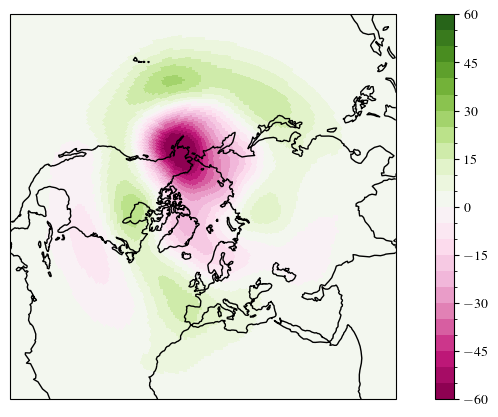

doing:  /glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982.h0.Z3.plevs.198201-201012.nc
doing pattern:  NAO
doing member: 0
plotting member:  0


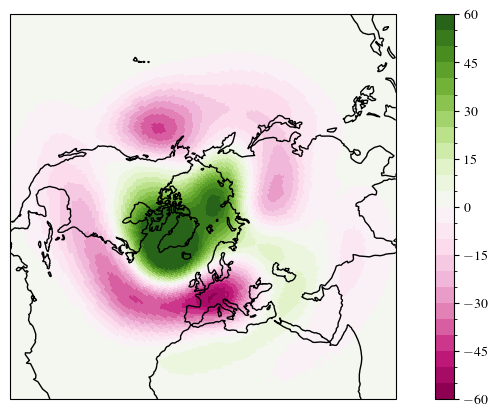

doing:  /glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982.h0.Z3.plevs.198201-201012.nc
doing pattern:  NAM
doing member: 0
plotting member:  0


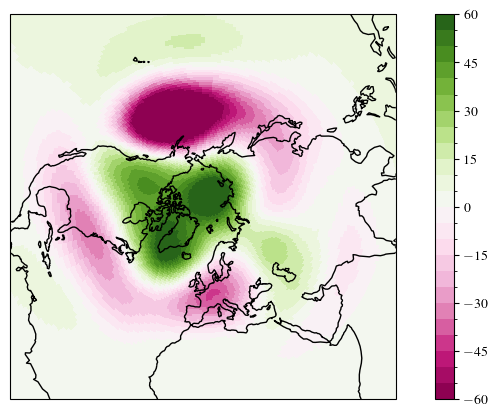

doing:  /glade/scratch/wchapman/ADF/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982/ts/f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982.h0.Z3.plevs.198201-201012.nc
doing pattern:  PNA
doing member: 0
plotting member:  0


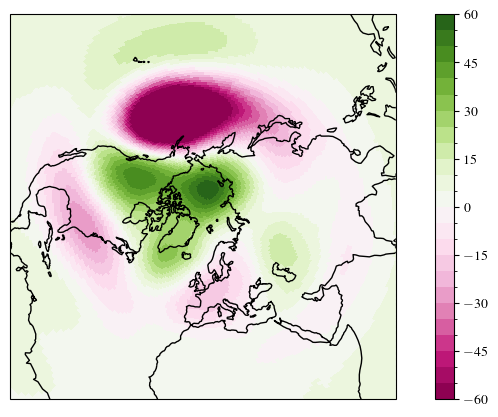

CPU times: user 19.9 s, sys: 1.18 s, total: 21.1 s
Wall time: 42.7 s


<xarray.Dataset>
Dimensions:       (member: 2, lat: 192, lon: 288, time: 87, lat_reg: 69,
                   lon_reg: 97)
Coordinates:
  * member        (member) int64 0 1
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time          (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2010-12-01
  * lat_reg       (lat_reg) float64 20.26 21.2 22.15 23.09 ... 82.46 83.4 84.35
  * lon_reg       (lon_reg) float64 120.0 121.2 122.5 ... 237.5 238.8 240.0
Data variables:
    PNA           (member, lat, lon) float64 -9.617 -9.617 ... 46.33 46.33
    PNA_PC        (member, time) float64 -0.5014 0.291 1.103 ... 0.9795 -0.5222
    PNA_var_frac  (member) float64 0.4523 0.4523
    PNA_inds      (member, time) float64 0.0 1.0 2.0 3.0 ... 83.0 84.0 85.0 86.0
    PNA_tot_var   (member, lat_reg, lon_reg) float64 0.1067 0.0839 ... 2.214e+03
    Z3            (time, lat, lon) float64 -53.19 -53.19 ... -107.1 -107.1
Attributes:
    title:    EOFs of member

In [7]:
%%time
season = 'DJF'
Patssave = ['NPO','NAO','NAM','PNA']
for Pats in Patssave:
    Pats = [Pats]
    Num_ENSE=2
    years_st='1982'
    years_en='2010'

    mon_dict = {'DJF':[3,12],'MAM':[3,3],'JJA':[3,6],'SON':[3,9],'ANN':[12,1]}
    mon_retrieve = mon_dict[season][1]
    roll_num = mon_dict[season][0]

    print('doing: ',mod_fix)
    ERAi = xr.open_dataset(mod_fix).sel(lev=500)

    ##fix time... 
    #re-align time...
    ERAi['time'] = pd.date_range(start=years_st+'-01-01',end=years_en+'-12-01',freq='MS')
    ERAi = ERAi.sel(time=slice(years_st+'-01-01',years_en+'-12-01'))
    # ERAi = ERAi['PSL'].rolling(time=roll_num).mean()

    DS_roll = Seas_Avg_TS(ERAi,'Z3',1)
    #create seasons...
    DS_D = DS_roll.sel(time=is_mon(DS_roll['time.month'],12))
    #remove mean 
    DS_D = DS_D - DS_D.mean('time')
    DS_J = DS_roll.sel(time=is_mon(DS_roll['time.month'],1))
    DS_J = DS_J - DS_J.mean('time')
    DS_F = DS_roll.sel(time=is_mon(DS_roll['time.month'],2))
    DS_F = DS_F - DS_F.mean('time')
    DS_SEA = xr.merge([DS_D,DS_J,DS_F])['Z3']

    latshape=len(DS_SEA['lat'])
    lonshape=len(DS_SEA['lon'])
    subsel = np.arange(0,len(DS_SEA['time']))

    for ee,pattern in enumerate(Pats):
        print('doing pattern: ',pattern)
        #modes defined here: https://opensky.ucar.edu/islandora/object/manuscripts:1001
        if pattern == 'PNA':
            latdo = [20,85]
            londo = [120,240]
            getmode=0

        if pattern == 'NPO':
            latdo = [20,85]
            londo = [120,240]
            getmode=1

        if pattern == 'NAM':
            latdo = [20,89]
            londo = [0,360]
            getmode=0

        if pattern == 'SAM':
            latdo = [-89,-20]
            londo = [0,360]
            getmode=0

        if pattern == 'PSA1':
            latdo = [-89,-20]
            londo = [0,360]
            getmode=1

        if pattern == 'PSA2':
            latdo = [-89,-20]
            londo = [0,360]
            getmode=2

        if pattern == 'NAO':
            latdo = [20,80]
            londo = [-90,40]
            getmode=0

        #cosine weighting and take EOF ... of region...
        if pattern in ['NAM','SAM','PNA','NPO','PSA1','PSA2']:
            DS_reg_temp = ERAi.sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

        elif pattern == "NAO":
            DS_reg_temp = copy.deepcopy(ERAi)
            DS_reg_temp.coords['lon'] = (DS_reg_temp.coords['lon'] + 180) % 360 - 180
            DS_reg_temp = DS_reg_temp.sortby(DS_reg_temp.lon).sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

        latshape_reg=len(DS_reg_temp['lat'])
        lonshape_reg=len(DS_reg_temp['lon'])


        fullpat = np.zeros([Num_ENSE,latshape,lonshape])
        fullpc = np.zeros([Num_ENSE,len(DS_SEA['time'])])
        var_exp = np.zeros([Num_ENSE])
        indsdo_all = np.zeros([Num_ENSE,len(DS_SEA['time'])])
        full_Recon_pattern = np.zeros([Num_ENSE,latshape_reg,lonshape_reg])

        for ense_r in range(0,Num_ENSE):
            if ense_r % 30==0:
                print('doing member:', ense_r)
            #random subset:
            indsdo = random.sample(list(subsel),k=len(subsel))  
            indsdo = sorted(indsdo)
            DS = DS_SEA.isel(time=indsdo)
            DS['time'] = DS_SEA['time']
            latshape=len(DS['lat'])
            lonshape=len(DS['lon'])

            #cosine weighting and take EOF ... of region...
            if pattern in ['NAM','SAM','PNA','NPO','PSA1','PSA2']:
                DA_do = DS.sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

            elif pattern == "NAO":
                DA_do = copy.deepcopy(DS)
                DA_do.coords['lon'] = (DS.coords['lon'] + 180) % 360 - 180
                DA_do = DA_do.sortby(DA_do.lon).sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

            coslat = np.cos(np.deg2rad(DA_do.coords['lat'].values))
            wgts = np.sqrt(coslat)[..., np.newaxis]
            solver = Eof(DA_do, weights=wgts,center=False)
            pc1 = solver.pcs(npcs=10, pcscaling=1).sel(mode=getmode)

            #solve the regression problem as a covariance problem.... 
            bb = ma.dot((DS).stack(allpoints=['lat','lon']).T,pc1)/(len(pc1)-1)
            patdone = bb.reshape([latshape,lonshape])

            fullpat[ense_r,:,:] = patdone
            fullpc[ense_r,:] = np.array(pc1).squeeze()
            indsdo_all[ense_r,:] = np.array(indsdo).squeeze() #####@
            var_exp[ense_r] = np.array(solver.varianceFraction(neigs=10))[getmode]   

            ##reconstruction
            Recon_pattern = solver.reconstructedField(neofs=[getmode+1])
            Recon_pattern_var = Recon_pattern.var('time') 
            full_Recon_pattern[ense_r,:,:]=Recon_pattern_var

        #this is your dataset:  
        if ee==0:
            C_for_comp = xr.Dataset(
                {
                    pattern: (["member","lat", "lon"],fullpat),    
                    pattern+"_PC": (["member","time"],np.array(fullpc).squeeze()), 
                    pattern+"_var_frac":(["member"],var_exp.squeeze()),
                    pattern+"_inds": (["member","time"],np.array(indsdo_all).squeeze()),
                    pattern+"_tot_var":(["member","lat_reg","lon_reg"],full_Recon_pattern.squeeze()),
                     "Z3":(["time","lat","lon"],DS_SEA.data),
                },
                coords={
                    "member":np.arange(0,Num_ENSE),
                    "lat":np.array(DS['lat']),
                    "lon":np.array(DS['lon']),
                    "time":pc1['time'].data[:],
                    "lat_reg":np.array(Recon_pattern_var['lat']),
                    "lon_reg":np.array(Recon_pattern_var['lon']),
                },)
            C_for_comp.attrs["title"] = "EOFs of member"
            C_for_comp[pattern].attrs['units'] = 'PA'
            C_for_comp[pattern].attrs['standard_name']='Pattern Regressed on PC scaled to unit variance '
            C_for_comp[pattern+"_PC"].attrs['standard_name']='PC scaled to unit variance '

        #this is your dataset:  
        else:
            C_temp = xr.Dataset(
                {
                    pattern: (["member","lat", "lon"],fullpat),    
                    pattern+"_PC": (["member","time"],np.array(fullpc).squeeze()), 
                    pattern+"_var_frac":(["member"],var_exp.squeeze()),
                    pattern+"_inds": (["member","time"],np.array(indsdo_all).squeeze()),
                    pattern+"_tot_var":(["member","lat_reg","lon_reg"],full_Recon_pattern.squeeze()),
                     "Z3":(["time","lat","lon"],DS_SEA.data),
                },
                coords={
                    "member":np.arange(0,Num_ENSE),
                    "lat":np.array(DS['lat']),
                    "lon":np.array(DS['lon']),
                    "time":pc1['time'].data[:],
                    "lat_reg":np.array(Recon_pattern_var['lat']),
                    "lon_reg":np.array(Recon_pattern_var['lon']),
                },)
            C_temp.attrs["title"] = "EOFs of member"
            C_temp[pattern].attrs['units'] = 'PA'
            C_temp[pattern].attrs['standard_name']='Pattern Regressed on PC scaled to unit variance '
            C_temp[pattern+"_PC"].attrs['standard_name']='PC scaled to unit variance '
            print('...merging...')
            C_for_comp = xr.merge([C_for_comp,C_temp])

        ### 
        memno=0 #member to plot...
        print('plotting member: ', memno)
        if pattern in ['NAM','NAO','PNA','NPO']:
            Max_Pascal=60
            cmap = plt.colormaps['PiYG']
            levels = MaxNLocator(nbins=25).tick_values(-Max_Pascal,Max_Pascal)
            norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

            fig = plt.figure(figsize=[10, 5])
            ax1 = fig.add_subplot(111, projection=ccrs.NorthPolarStereo())
            lat = C_for_comp['lat']
            lon = C_for_comp['lon']
            plotter = C_for_comp[pattern].sel(member=memno)
            cs2=ax1.pcolormesh(lon,lat,plotter,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
            ax1.set_extent([-180, 180, 10, 90], crs=ccrs.PlateCarree())
            ax1.coastlines()
            plt.colorbar(cs2)
            plt.show()

        if pattern in ['SAM','PSA1','PSA2']:
            Max_Pascal=60
            cmap = plt.colormaps['PiYG']
            levels = MaxNLocator(nbins=25).tick_values(-Max_Pascal,Max_Pascal)
            norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

            fig = plt.figure(figsize=[10, 5])
            ax1 = fig.add_subplot(111, projection=ccrs.SouthPolarStereo())
            lat = C_for_comp['lat']
            lon = C_for_comp['lon']
            plotter = C_for_comp[pattern].sel(member=memno)
            cs2=ax1.pcolormesh(lon,lat,plotter,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
            ax1.set_extent([-180, 180, -10, -90], crs=ccrs.PlateCarree())
            ax1.coastlines()
            plt.colorbar(cs2)
            plt.show()  

    out_dir = '/glade/work/wchapman/DA_ML/data_handling/Random_Data/'
    C_for_comp.to_netcdf(out_dir+mod_fix.split('/')[-1].split('.h0')[0]+'.'+Pats[0]+'_Z500_ModesofVarDJF.nc')
C_for_comp

# Bootstrap the Obs

In [8]:
%%time
season = 'DJF'
PatAll = ['NPO','NAO','NAM','PNA']

for Pats in PatAll:
    Pats = [Pats]
    fil_OBS_Patterns = '/glade/work/wchapman/DA_ML/data_handling/Random_Data/Patterns_'+season+'.'+Pats[0]+'_Z500_var_OBS_spread_1980_2010.nc'
    if not os.path.exists(fil_OBS_Patterns): 
        Num_ENSE=1000
        years_st='1980'
        years_en='2010'

        mon_dict = {'DJF':[3,12],'MAM':[3,3],'JJA':[3,6],'SON':[3,9],'ANN':[12,1]}
        mon_retrieve = mon_dict[season][1]
        roll_num = mon_dict[season][0]

        ERAi = xr.open_dataset('/glade/scratch/wchapman/ADF/ERAi.h0.Z3.plevs.198201-201012.nc')
        ERAi = ERAi.sel(level=500)
        ERAi = ERAi.sel(time=slice(years_st+'-01-01',years_en+'-12-01'))
        ERAi['z']=ERAi['z']/9.81

        print('...here...')

        DS_roll = Seas_Avg_TS(ERAi,'z',1)
        #create seasons...
        DS_D = DS_roll.sel(time=is_mon(DS_roll['time.month'],12))
        #remove mean 
        DS_D = DS_D - DS_D.mean('time')
        DS_J = DS_roll.sel(time=is_mon(DS_roll['time.month'],1))
        DS_J = DS_J - DS_J.mean('time')
        DS_F = DS_roll.sel(time=is_mon(DS_roll['time.month'],2))
        DS_F = DS_F - DS_F.mean('time')
        DS_SEA = xr.merge([DS_D,DS_J,DS_F])['z']

        # DS_SEA = ERAi.sel(time=is_mon(ERAi['time.month'],mon_retrieve))['z']

        latshape=len(DS_SEA['lat'])
        lonshape=len(DS_SEA['lon'])
        subsel = np.arange(0,len(DS_SEA['time']))

        for ee,pattern in enumerate(Pats):
            print('doing pattern: ',pattern)
            #modes defined here: https://opensky.ucar.edu/islandora/object/manuscripts:1001
            if pattern == 'PNA':
                latdo = [20,85]
                londo = [120,240]
                getmode=0

            if pattern == 'NPO':
                latdo = [20,85]
                londo = [120,240]
                getmode=1

            if pattern == 'NAM':
                latdo = [20,89]
                londo = [0,360]
                getmode=0

            if pattern == 'SAM':
                latdo = [-89,-20]
                londo = [0,360]
                getmode=0

            if pattern == 'PSA1':
                latdo = [-89,-20]
                londo = [0,360]
                getmode=1

            if pattern == 'PSA2':
                latdo = [-89,-20]
                londo = [0,360]
                getmode=2

            if pattern == 'NAO':
                latdo = [20,80]
                londo = [-90,40]
                getmode=0

            #cosine weighting and take EOF ... of region...
            if pattern in ['NAM','SAM','PNA','NPO','PSA1','PSA2']:
                DS_reg_temp = ERAi.sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

            elif pattern == "NAO":
                DS_reg_temp = copy.deepcopy(ERAi)
                DS_reg_temp.coords['lon'] = (DS_reg_temp.coords['lon'] + 180) % 360 - 180
                DS_reg_temp = DS_reg_temp.sortby(DS_reg_temp.lon).sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

            latshape_reg=len(DS_reg_temp['lat'])
            lonshape_reg=len(DS_reg_temp['lon'])


            mon_dict = {'DJF':[3,2],'MAM':[3,5],'JJA':[3,8],'SON':[3,11],'ANN':[12,12]}
            mon_retrieve = mon_dict[season][1]
            roll_num = mon_dict[season][0]

            fullpat = np.zeros([Num_ENSE,latshape,lonshape])
            fullpc = np.zeros([Num_ENSE,len(DS_SEA['time'])])
            var_exp = np.zeros([Num_ENSE])
            indsdo_all = np.zeros([Num_ENSE,len(DS_SEA['time'])])

            full_Recon_pattern = np.zeros([Num_ENSE,latshape_reg,lonshape_reg])

            for ense_r in range(0,Num_ENSE):
                if ense_r % 30==0:
                    print('doing member:', ense_r)
                #random subset:
                indsdo = random.choices(subsel,k=len(subsel))        
                DS = DS_SEA.isel(time=indsdo)
                DS['time'] = DS_SEA['time']
                latshape=len(DS['lat'])
                lonshape=len(DS['lon'])

                #cosine weighting and take EOF ... of region...
                if pattern in ['NAM','SAM','PNA','NPO','PSA1','PSA2']:
                    DA_do = DS.sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

                elif pattern == "NAO":
                    DA_do = copy.deepcopy(DS)
                    DA_do.coords['lon'] = (DS.coords['lon'] + 180) % 360 - 180
                    DA_do = DA_do.sortby(DA_do.lon).sel(lat=slice(latdo[0],latdo[1]),lon=slice(londo[0],londo[1]))

                coslat = np.cos(np.deg2rad(DA_do.coords['lat'].values))
                wgts = np.sqrt(coslat)[..., np.newaxis]
                solver = Eof(DA_do, weights=wgts,center=False)
                pc1 = solver.pcs(npcs=10, pcscaling=1).sel(mode=getmode)

                #solve the regression problem as a covariance problem.... 
                bb = ma.dot((DS).stack(allpoints=['lat','lon']).T,pc1)/(len(pc1)-1)
                patdone = bb.reshape([latshape,lonshape])

                fullpat[ense_r,:,:] = patdone
                fullpc[ense_r,:] = np.array(pc1).squeeze()
                indsdo_all[ense_r,:] = np.array(indsdo).squeeze() #####@
                var_exp[ense_r] = np.array(solver.varianceFraction(neigs=10))[getmode]

                 ##reconstruction
                Recon_pattern = solver.reconstructedField(neofs=[getmode+1])
                Recon_pattern_var = Recon_pattern.var('time') 
                full_Recon_pattern[ense_r,:,:]=Recon_pattern_var

            #this is your dataset:  
            if ee==0:
                C_for_obs = xr.Dataset(
                    {
                        pattern: (["member","lat", "lon"],fullpat),    
                        pattern+"_PC": (["member","time"],np.array(fullpc).squeeze()), 
                        pattern+"_var_frac":(["member"],var_exp.squeeze()),
                        pattern+"_inds": (["member","time"],np.array(indsdo_all).squeeze()),
                        pattern+"_tot_var":(["member","lat_reg","lon_reg"],full_Recon_pattern.squeeze()),
                    },
                    coords={
                        "member":np.arange(0,Num_ENSE),
                        "lat":np.array(DS['lat']),
                        "lon":np.array(DS['lon']),
                        "time":pc1['time'].data[:],
                        "lat_reg":np.array(Recon_pattern_var['lat']),
                        "lon_reg":np.array(Recon_pattern_var['lon']),
                    },)
                C_for_obs.attrs["title"] = "EOFs of member"
                C_for_obs[pattern].attrs['units'] = 'PA'
                C_for_obs[pattern].attrs['standard_name']='Pattern Regressed on PC scaled to unit variance '
                C_for_obs[pattern+"_PC"].attrs['standard_name']='PC scaled to unit variance '

            #this is your dataset:  
            else:
                C_temp = xr.Dataset(
                    {
                        pattern: (["member","lat", "lon"],fullpat),    
                        pattern+"_PC": (["member","time"],np.array(fullpc).squeeze()), 
                        pattern+"_var_frac":(["member"],var_exp.squeeze()),
                        pattern+"_inds": (["member","time"],np.array(indsdo_all).squeeze()),
                        pattern+"_tot_var":(["member","lat_reg","lon_reg"],full_Recon_pattern.squeeze()),
                    },
                    coords={
                        "member":np.arange(0,Num_ENSE),
                        "lat":np.array(DS['lat']),
                        "lon":np.array(DS['lon']),
                        "time":pc1['time'].data[:],
                        "lat_reg":np.array(Recon_pattern_var['lat']),
                        "lon_reg":np.array(Recon_pattern_var['lon']),
                    },)
                C_temp.attrs["title"] = "EOFs of member"
                C_temp[pattern].attrs['units'] = 'PA'
                C_temp[pattern].attrs['standard_name']='Pattern Regressed on PC scaled to unit variance '
                C_temp[pattern+"_PC"].attrs['standard_name']='PC scaled to unit variance '
                print('...merging...')
                C_for_obs = xr.merge([C_for_obs,C_temp])

            ### 
            memno=50 #member to plot...
            print('plotting member: ', memno)
            if pattern in ['NAM','NAO','PNA','NPO']:
                Max_Pascal=60
                cmap = plt.colormaps['PiYG']
                levels = MaxNLocator(nbins=25).tick_values(-Max_Pascal,Max_Pascal)
                norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

                fig = plt.figure(figsize=[10, 5])
                ax1 = fig.add_subplot(111, projection=ccrs.NorthPolarStereo())
                lat = C_for_obs['lat']
                lon = C_for_obs['lon']
                plotter = C_for_obs[pattern].sel(member=memno)
                cs2=ax1.pcolormesh(lon,lat,plotter,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
                ax1.set_extent([-180, 180, 10, 90], crs=ccrs.PlateCarree())
                ax1.coastlines()
                plt.colorbar(cs2)
                plt.show()

            if pattern in ['SAM','PSA1','PSA2']:
                Max_Pascal=60
                cmap = plt.colormaps['PiYG']
                levels = MaxNLocator(nbins=25).tick_values(-Max_Pascal,Max_Pascal)
                norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

                fig = plt.figure(figsize=[10, 5])
                ax1 = fig.add_subplot(111, projection=ccrs.SouthPolarStereo())
                lat = C_for_obs['lat']
                lon = C_for_obs['lon']
                plotter = C_for_obs[pattern].sel(member=memno)
                cs2=ax1.pcolormesh(lon,lat,plotter,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
                ax1.set_extent([-180, 180, -10, -90], crs=ccrs.PlateCarree())
                ax1.coastlines()
                plt.colorbar(cs2)
                plt.show()  
            C_for_obs.to_netcdf(fil_OBS_Patterns)
    else: 
        print('file exists! Loading!')
        C_for_obs = xr.open_dataset(fil_OBS_Patterns)
C_for_obs

file exists! Loading!
file exists! Loading!
file exists! Loading!
file exists! Loading!
CPU times: user 31.2 ms, sys: 10.9 ms, total: 42.1 ms
Wall time: 731 ms


<xarray.Dataset>
Dimensions:       (member: 1000, lat: 192, lon: 288, time: 87, lat_reg: 69,
                   lon_reg: 97)
Coordinates:
  * member        (member) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time          (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2010-12-01
  * lat_reg       (lat_reg) float64 20.26 21.2 22.15 23.09 ... 82.46 83.4 84.35
  * lon_reg       (lon_reg) float64 120.0 121.2 122.5 ... 237.5 238.8 240.0
Data variables:
    PNA           (member, lat, lon) float64 ...
    PNA_PC        (member, time) float64 ...
    PNA_var_frac  (member) float64 ...
    PNA_inds      (member, time) float64 ...
    PNA_tot_var   (member, lat_reg, lon_reg) float64 ...
Attributes:
    title:    EOFs of member

## Pat Do

...fixing pattern...
NAO
NAO
NAO
NAO
...done fixing pattern...


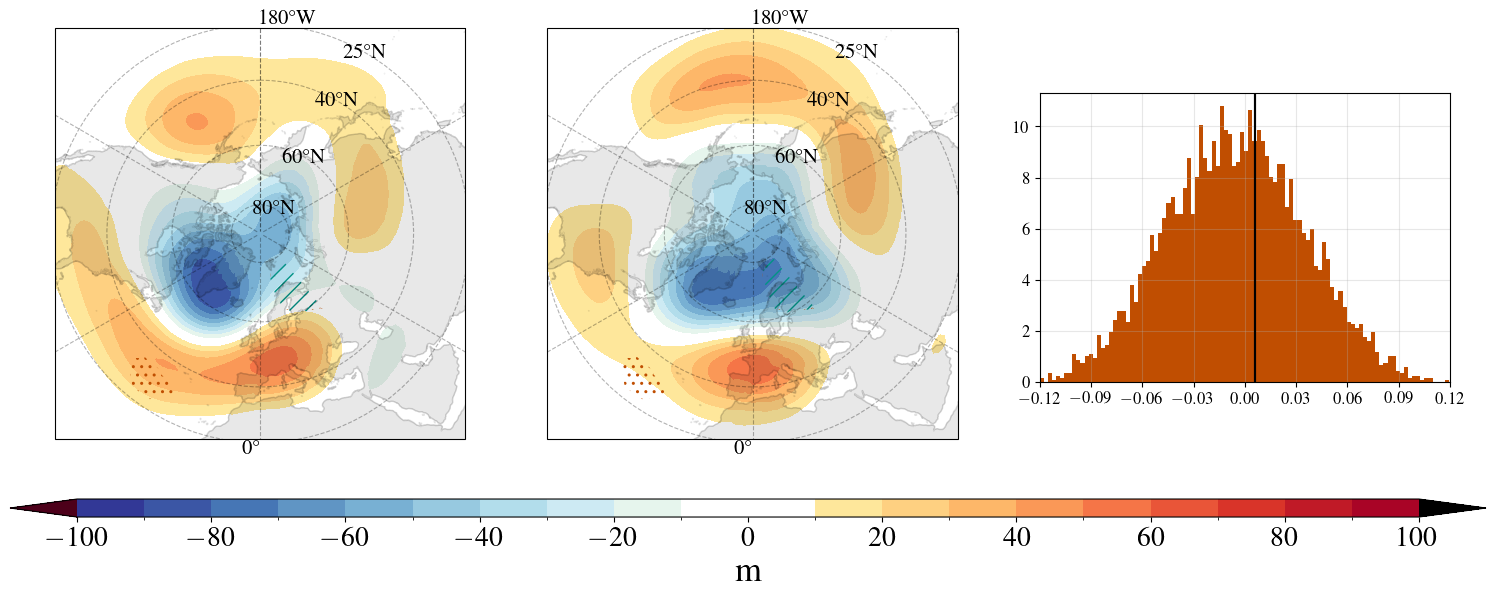

...done with Internal Var...


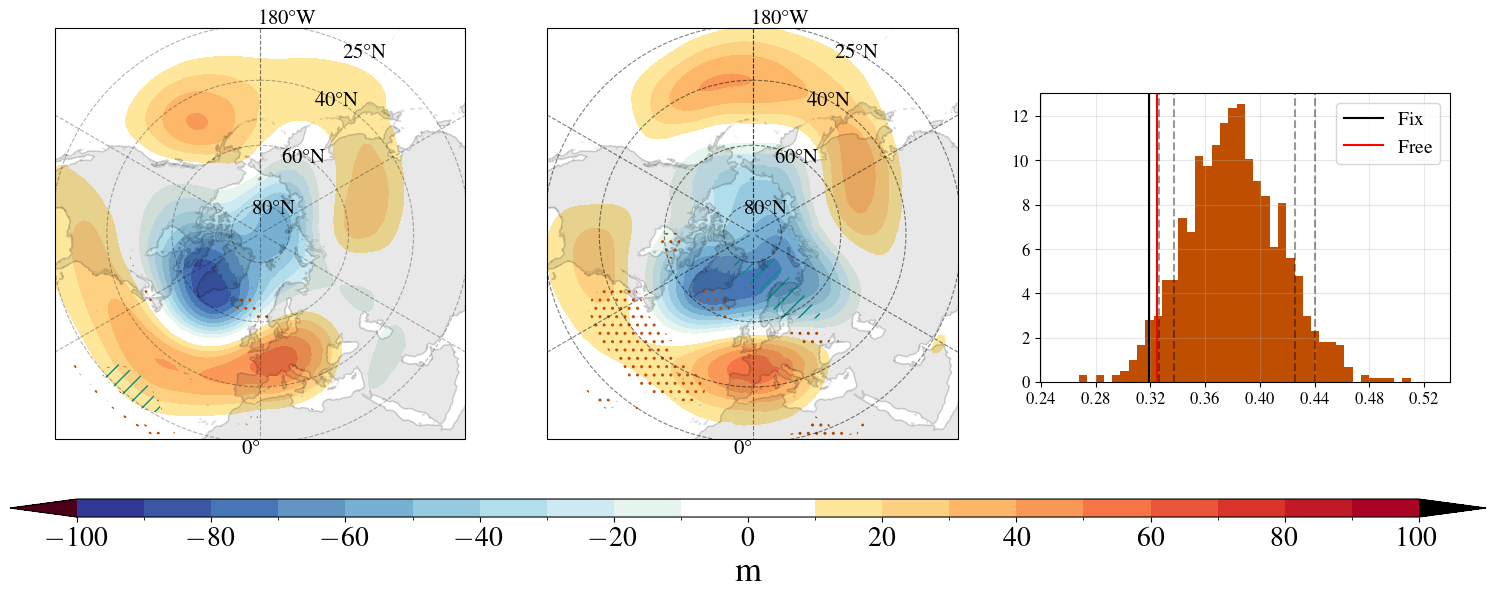

NAO 0.3191130478060625
free: 0.32489602305639637
...fixing pattern...
PNA
PNA
PNA
PNA
...done fixing pattern...


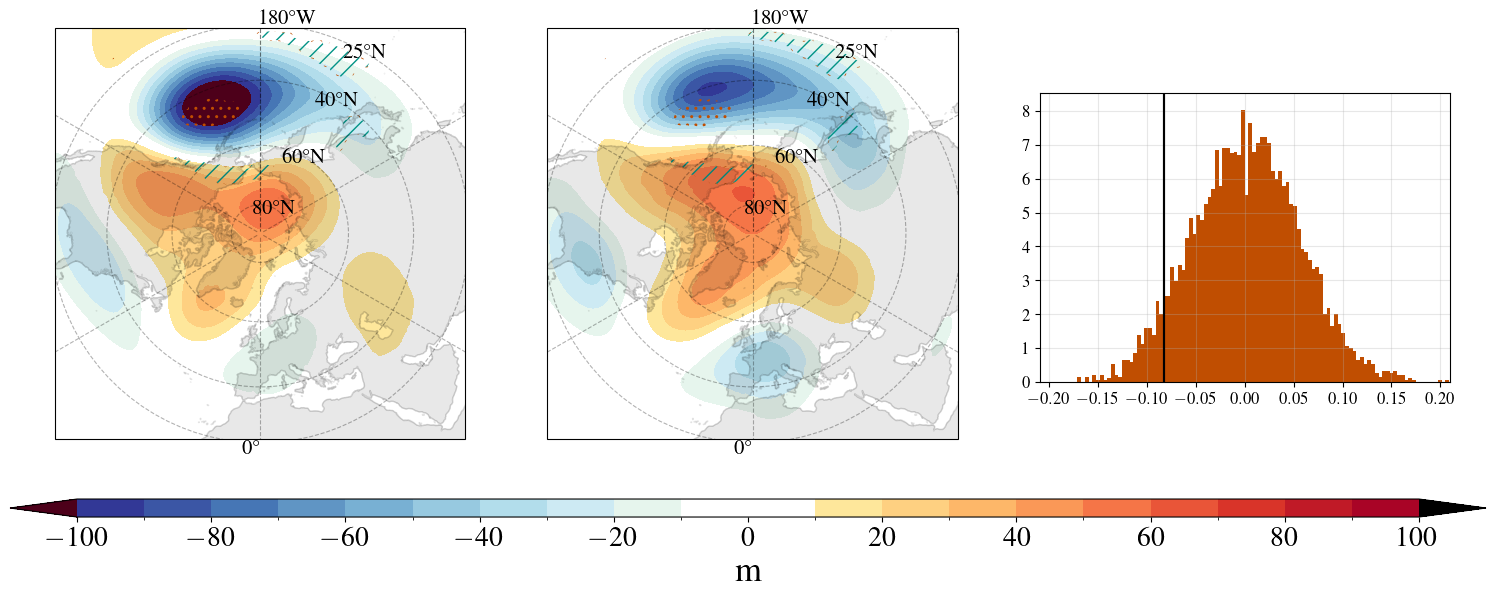

...done with Internal Var...


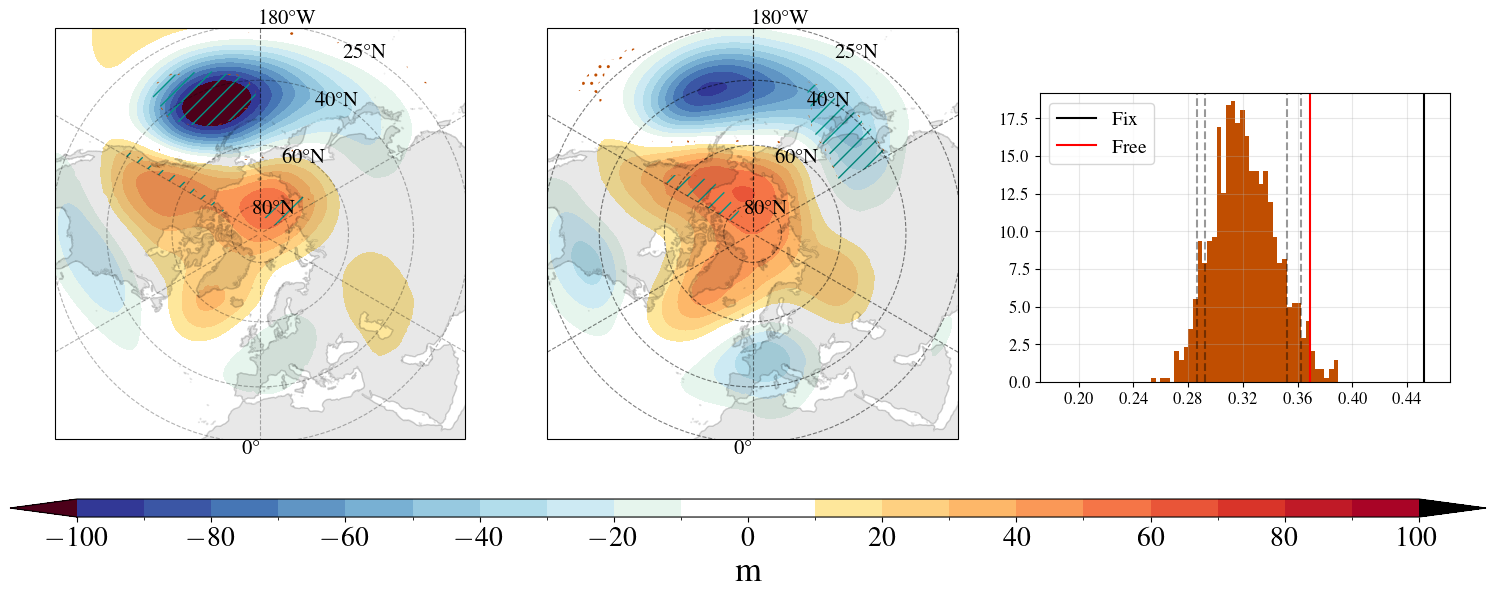

PNA 0.45229126558463406
free: 0.3693438603178547
f.e21.DAcompset.f09_d025_Seasonal_stochai_UV_00_1982.h0.Z3.plevs.198201-201012.nc


In [9]:
PatsDo=['NAO','PNA']
se = [-180, 180, 26, 90]

for PA_all in PatsDo:

    PA_all=[PA_all]
    sv_path = '/glade/work/wchapman/DA_ML/notebooks/Figures/Figure_output/Variance_Patterns/'
    # PA_all=['PNA']

    out_dir = '/glade/work/wchapman/DA_ML/data_handling/Random_Data/'

    C_for_obs = xr.open_dataset(out_dir+'/Patterns_'+season+'.'+PA_all[0]+'_Z500_var_OBS_spread_1980_2010.nc')
    C_for_comp = xr.open_dataset(out_dir+mod_fix.split('/')[-1].split('.h0')[0]+'.'+PA_all[0]+'_Z500_ModesofVarDJF.nc')
    C_for_free = xr.open_dataset(out_dir+mod_free.split('/')[-1].split('.h0')[0]+'.'+PA_all[0]+'_Z500_ModesofVarDJF.nc')
    C_for = xr.open_dataset(out_dir+'Patterns_'+season+'_Z500_LE_'+PA_all[0]+'_spread_1980_2010.nc')

    print('...fixing pattern...')
    C_for_fix = fix_EOF(C_for,PA_all)
    C_for_free_fix = fix_EOF(C_for_free,PA_all)
    C_for_comp_fix = fix_EOF(C_for_comp,PA_all)
    C_for_obs_fix = fix_EOF(C_for_obs,PA_all)
    print('...done fixing pattern...')

    for pattern in PA_all:
        diff_varfrac =  np.zeros([4950])
        indlist = []
        count=0
        for ii in C_for_fix[pattern].member.values:
            PNA_anom_orig = C_for_fix[pattern+'_var_frac'].sel(member=ii).values
            for jj in C_for_fix[pattern].member.values:

                if jj == ii:
                    continue
                if ([ii,jj] in indlist) | ([jj,ii] in indlist):
                    continue 
                PNA_anom_orig_weighted_2 = C_for_fix[pattern+'_var_frac'].sel(member=jj).values
                diff_varfrac[count] = PNA_anom_orig - PNA_anom_orig_weighted_2
                indlist.append([ii,jj])
                count+=1

        pf_vf = C_for_free_fix[pattern+'_var_frac'].sel(member=0).values
        pc_vf = C_for_comp_fix[pattern+'_var_frac'].sel(member=0).values
        vf_diff = pf_vf-pc_vf
        indlist = []
        diff_map =  np.zeros([4950,len(C_for_comp_fix['lat_reg']),len(C_for_comp_fix['lon_reg'])])
        count=0
        for ii in C_for_fix[pattern].member.values:
            PNA_anom_orig = C_for_fix[pattern+'_tot_var'].sel(member=ii).values
            for jj in C_for_fix[pattern+'_tot_var'].member.values:
                if jj == ii:
                    continue
                if ([ii,jj] in indlist) | ([jj,ii] in indlist):
                    continue 
                PNA_anom_orig_weighted_2 = C_for_fix[pattern+'_tot_var'].sel(member=jj).values
                diff_map[count,:,:] = PNA_anom_orig - PNA_anom_orig_weighted_2
                indlist.append([ii,jj])
                count+=1

        pf = C_for_free_fix[pattern+'_tot_var'].sel(member=0).values
        pc = C_for_comp_fix[pattern+'_tot_var'].sel(member=0).values

        comp_dif = pf - pc 
        perc_contour = np.zeros_like(comp_dif) 

        for lala in range(len(C_for_comp_fix['lat_reg'])):
            for lolo in range(len(C_for_comp_fix['lon_reg'])):
                val_arr = diff_map[:,lala,lolo]
                comp_val = comp_dif[lala,lolo]
                perc_contour[lala,lolo] = stats.percentileofscore(val_arr,comp_val)


        perc_contour2 = copy.deepcopy(perc_contour)
        perc_contour2[perc_contour2>99]=900
        perc_contour2[perc_contour2<1]=800
        perc_contour2[perc_contour2<700]=0

        ####### +++++ plot 1 +++++ #####################
        ####### +++++ plot 1 +++++ #####################
        ####### +++++ plot 1 +++++ #####################
        ####### +++++ plot 1 +++++ #####################

        ####### +++++ plot 1 +++++ #####################
        ####### +++++ plot 1 +++++ #####################
        ####### +++++ plot 1 +++++ #####################
        ####### +++++ plot 1 +++++ #####################

        #### +++ colormap
        Max_Pascal=100
        cmap = plt.colormaps['RdYlBu_r']

        cmap = plt.cm.RdYlBu_r
        # extract all colors from the Reds map
        cmaplist = [cmap(i) for i in range(cmap.N)]
        # make the first color entry to be whhite
        cmaplist[0] = cmap(1)
        # make the last color entry to be most extreme--
        cmaplist[cmap.N-1] = cmap(0.99)

        for ii in range(120,136):
            cmaplist[ii]=[1,1,1,1]
        cmap.N
        # create the new map
        cmap = cmap.from_list('My cmap', cmaplist, cmap.N)
        cmap.set_under([0.3, 0.00, 0.1, 1.0])
        cmap.set_over('k')

        levels = MaxNLocator(nbins=23).tick_values(-Max_Pascal,Max_Pascal)
        norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

        #### --- colormap
        #### ++ init fig
        fig = plt.figure(figsize=[18,9])
        #### -- init fig

        ### +++ fig left 
        ax1 = fig.add_subplot(131, projection=ccrs.NorthPolarStereo())
        ax1.coastlines(alpha=0.1)
        gl = ax1.gridlines(draw_labels=True, xlocs=None, ylocs=[25,40,60,80], color='black', alpha=0.3, linestyle='--')
        gl.n_steps = 90
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'weight': 'bold','size': 15, 'color': 'black', 'rotation': 0}
        gl.ylabel_style = {'weight': 'bold','size': 15, 'color': 'black'}
        ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='k',alpha=0.09))
        lat = C_for_comp_fix['lat']
        lon = C_for_comp_fix['lon']
        lat_reg = C_for_comp_fix['lat_reg']
        lon_reg = C_for_comp_fix['lon_reg']

        ###### +++add cyclic point
        plotter = C_for_comp_fix[pattern].sel(member=0)
        plotter_cyclic, lon_cyclic = add_cyclic_point(plotter, coord=plotter.lon)
        ###### ---add cyclic point

        # perc_contour2[np.abs(plotter)<10]=0 #set below thresh to zero
        cs2=ax1.contourf(lon_cyclic,lat,plotter_cyclic,levels=levels,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm,extend='both')
        cs3=ax1.contourf(np.array(lon_reg),lat_reg,np.array(perc_contour2),levels =[600,800,999], hatches=['..' ,'//'],transform=ccrs.PlateCarree(), colors='none')

        # ------------------------------
        # New bit here that handles changing the color of hatches
        colors = ['xkcd:burnt orange', 'xkcd:teal', 'darkorange', 'gold', 'forestgreen',
                  'darkturquoise', 'dodgerblue', 'darkviolet']
        # For each level, we set the color of its hatch 
        for i, collection in enumerate(cs3.collections):
            collection.set_edgecolor(colors[i % len(colors)])
        # Doing this also colors in the box around each level
        # We can remove the colored line around the levels by setting the linewidth to 0
        for collection in cs3.collections:
            collection.set_linewidth(0.)
        # ------------------------------
        ax1.set_extent(se, crs=ccrs.PlateCarree())
        ### --- fig left 

        ### +++ fig right
        ax2 = fig.add_subplot(132, projection=ccrs.NorthPolarStereo())
        ax2.coastlines(alpha=0.1)
        gl = ax2.gridlines(draw_labels=True, xlocs=None, ylocs=[25,40,60,80], color='black', alpha=0.3, linestyle='--')
        gl.n_steps = 90
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'weight': 'bold','size': 15, 'color': 'black', 'rotation': 0}
        gl.ylabel_style = {'weight': 'bold','size': 15, 'color': 'black'}

        ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='k',alpha=0.09))
        lat = C_for_free_fix['lat']
        lon = C_for_free_fix['lon']

        ###### +++add cyclic point
        plotter = C_for_free_fix[pattern].sel(member=0)
        plotter_cyclic, lon_cyclic = add_cyclic_point(plotter, coord=plotter.lon)
        ###### ---add cyclic point

        cs2=ax2.contourf(lon_cyclic,lat,plotter_cyclic,levels=levels,transform=ccrs.PlateCarree(), cmap=cmap, norm=norm,extend='both')
        cs3=ax2.contourf(np.array(lon_reg),lat_reg,np.array(perc_contour2),levels =[600,800,999], hatches=['..' ,'//'],transform=ccrs.PlateCarree(), colors='none')

        # ------------------------------
        # New bit here that handles changing the color of hatches
        colors = ['xkcd:burnt orange', 'xkcd:teal', 'darkorange', 'gold', 'forestgreen',
                  'darkturquoise', 'dodgerblue', 'darkviolet']
        # For each level, we set the color of its hatch 
        for i, collection in enumerate(cs3.collections):
            collection.set_edgecolor(colors[i % len(colors)])
        # Doing this also colors in the box around each level
        # We can remove the colored line around the levels by setting the linewidth to 0
        for collection in cs3.collections:
            collection.set_linewidth(0.)
        # ------------------------------
        ax2.set_extent(se, crs=ccrs.PlateCarree())
        ### --- fig right 


        #### +++++ histogram #### 
        # create grid for different subplots
        spec = mpl.gridspec.GridSpec(ncols=3, nrows=2,
                                 width_ratios=[1,1,1], wspace=0.2,
                                 hspace=0.4, height_ratios=[1,1],top=1.1,bottom=0.33)

        ax3 = fig.add_subplot(spec[5])
        ax3.hist(diff_varfrac,100,density=True,color='xkcd:burnt orange')

        mghi = np.max(ax3.hist(diff_varfrac,100,density=True,color='xkcd:burnt orange')[0])
        bhigh = np.max(np.round(np.abs(ax3.hist(diff_varfrac,100,density=True,color='xkcd:burnt orange')[1]),2))

        plt.plot([vf_diff,vf_diff],[0,mghi+1],color='k')
        tts = MaxNLocator(nbins=9).tick_values(-bhigh,bhigh)
        plt.plot([vf_diff,vf_diff],[0,mghi+1],color='k')
        plt.xticks(tts,fontsize=12)
        plt.yticks(fontsize=12)

        plt.ylim([0,mghi+0.5])
        plt.xlim([-bhigh,bhigh])
        plt.grid(True,alpha=0.3)

        #### +++++ histogram #### 

        ## +++inset colorbar:
        ax4 = fig.add_axes([0.1, 0.18, 0.82, 0.02])
        cb = mpl.colorbar.ColorbarBase(ax4, cmap=cmap, norm=norm, extend='both', spacing='proportional', ticks=levels[::2], boundaries=levels,orientation='horizontal')
        ax4.set_xlabel('m', size=25)
        cb.ax.tick_params(labelsize=20)
        tick_locator = ticker.MaxNLocator(nbins=10)
        cb.locator = tick_locator
        ## ---inset colorbar:

        ## +++save
        sv_nam = pattern+'_'+mod_fix.split('/')[-1].split('.h0.')[0] +'_vs_LE_Z500_var.png'
        plt.savefig(sv_path+sv_nam, dpi=200,bbox_inches='tight')
        plt.show()
        ## ---save 

        ####### ----- plot 1 ---- #####################
        ####### ----- plot 1 ---- #####################
        ####### ----- plot 1 ---- #####################
        ####### ----- plot 1 ---- #####################
        ####### ----- plot 1 ---- #####################
        ####### ----- plot 1 ---- #####################
        ####### ----- plot 1 ---- #####################
        ####### ----- plot 1 ---- #####################
        print('...done with Internal Var...')

        rank_mod_free = np.zeros_like(C_for_obs_fix[pattern+'_tot_var'].sel(member=111))
        bs_pattern_obs = C_for_obs_fix[pattern+'_tot_var'].values
        bs_pattern_free = C_for_free_fix[pattern+'_tot_var'].sel(member=0).values

        for lala in range(len(C_for_comp_fix['lat_reg'])):
            for lolo in range(len(C_for_comp_fix['lon_reg'])):
                val_arr = bs_pattern_obs[:,lala,lolo]
                comp_val = bs_pattern_free[lala,lolo]
                rank_mod_free[lala,lolo] = stats.percentileofscore(val_arr,comp_val)


        rank_mod_comp = np.zeros_like(C_for_obs_fix[pattern+'_tot_var'].sel(member=111))
        bs_pattern_obs = C_for_obs_fix[pattern+'_tot_var'].values
        bs_pattern_comp = C_for_comp_fix[pattern+'_tot_var'].sel(member=0).values

        for lala in range(len(C_for_comp_fix['lat_reg'])):
            for lolo in range(len(C_for_comp_fix['lon_reg'])):
                val_arr = bs_pattern_obs[:,lala,lolo]
                comp_val = bs_pattern_comp[lala,lolo]
                rank_mod_comp[lala,lolo] = stats.percentileofscore(val_arr,comp_val)

        ####### +++++ plot 3 +++++ #####################
        ####### +++++ plot 3 +++++ #####################
        ####### +++++ plot 3 +++++ #####################
        ####### +++++ plot 3 +++++ #####################

        ###+++colormap

        Max_Pascal=100
        cmap = plt.colormaps['RdYlBu_r']

        cmap = plt.cm.RdYlBu_r
        # extract all colors from the Reds map
        cmaplist = [cmap(i) for i in range(cmap.N)]
        # make the first color entry to be whhite
        cmaplist[0] = cmap(1)
        # make the last color entry to be most extreme--
        cmaplist[cmap.N-1] = cmap(0.99)

        for ii in range(120,136):
            cmaplist[ii]=[1,1,1,1]
        cmap.N
        # create the new map
        cmap = cmap.from_list('My cmap', cmaplist, cmap.N)
        cmap.set_under([0.3, 0.00, 0.1, 1.0])
        cmap.set_over('k')
        levels = MaxNLocator(nbins=23).tick_values(-Max_Pascal,Max_Pascal)
        norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

        ###---colormap

        fig = plt.figure(figsize=[18,9])

        ## +++ subplot1
        ax1 = fig.add_subplot(132, projection=ccrs.NorthPolarStereo())
        ax1.coastlines(alpha=0.1)
        gl = ax1.gridlines(draw_labels=True, xlocs=None, ylocs=[25,40,60,80], color='black', alpha=0.5, linestyle='--')
        gl.n_steps = 90
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'weight': 'bold','size': 15, 'color': 'black', 'rotation': 0}
        gl.ylabel_style = {'weight': 'bold','size': 15, 'color': 'black'}
        ax1.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='k',alpha=0.09))

        lat = C_for_comp_fix['lat']
        lon = C_for_comp_fix['lon']
        plotter = C_for_comp_fix[pattern].sel(member=0)
        bs_pattern_free = C_for_free_fix[pattern].sel(member=0).values

        ###### +++add cyclic point
        plotter = C_for_free_fix[pattern].sel(member=0)
        plotter_mesh_cyclic, lon_cyclic = add_cyclic_point(plotter, coord=plotter.lon)
        ###### ---add cyclic point

        cs2=ax1.contourf(lon_cyclic,lat,plotter_mesh_cyclic,transform=ccrs.PlateCarree(),levels=levels, cmap=cmap, norm=norm,extend='both')
        plotter_low = copy.deepcopy(rank_mod_free)
        plotter_low[rank_mod_free>1]=np.nan
        plotter_high = copy.deepcopy(rank_mod_free)
        plotter_high[rank_mod_free<99]=np.nan
        bs_pattern_free = C_for_free_fix[pattern].sel(member=0).values
        plotter_low2 = copy.deepcopy(plotter_low)
        plotter_low2[plotter_low2>-1] = 10
        plotter_high2 = copy.deepcopy(plotter_high)
        plotter_high2[plotter_high2>-1] = 20
        totter = np.nansum([plotter_low2,plotter_high2],axis=0)
        # totter[np.abs(plotter.sel(lat=slice(lat_reg[0],lat_reg[-1]),lon=slice(lon_reg[0],lat_reg[-1])))<10]=0 #zero below threshold
        cs3=ax1.contourf(np.array(lon_reg),lat_reg,np.array(totter),levels =[5,10,20], hatches=['..' ,'//'],transform=ccrs.PlateCarree(), colors='none')

        # ------------------------------
        # New bit here that handles changing the color of hatches
        colors = ['xkcd:burnt orange', 'xkcd:teal', 'darkorange', 'gold', 'forestgreen',
                  'darkturquoise', 'dodgerblue', 'darkviolet']
        # For each level, we set the color of its hatch 
        for i, collection in enumerate(cs3.collections):
            collection.set_edgecolor(colors[i % len(colors)])
        # Doing this also colors in the box around each level
        # We can remove the colored line around the levels by setting the linewidth to 0
        for collection in cs3.collections:
            collection.set_linewidth(0.)
        # # ------------------------------

        ax1.set_extent(se, crs=ccrs.PlateCarree())
        ## --- subplot1

        ## +++ subplot2
        ax2 = fig.add_subplot(131, projection=ccrs.NorthPolarStereo())
        ax2.coastlines(alpha=0.1)
        gl = ax2.gridlines(draw_labels=True, xlocs=None, ylocs=[25,40,60,80], color='black', alpha=0.3, linestyle='--')
        gl.n_steps = 90
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
        gl.xlabel_style = {'weight': 'bold','size': 15, 'color': 'black', 'rotation': 0}
        gl.ylabel_style = {'weight': 'bold','size': 15, 'color': 'black'}

        ax2.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='face', facecolor='k',alpha=0.09))
        lat = C_for_free_fix['lat']
        lon = C_for_free_fix['lon']
        plotter_low = copy.deepcopy(rank_mod_comp)
        plotter_low[rank_mod_comp>6.2]=np.nan
        plotter_high = copy.deepcopy(rank_mod_comp)
        plotter_high[rank_mod_comp<94.8]=np.nan
        bs_pattern_free = C_for_comp_fix[pattern].sel(member=0).values

        ###### +++add cyclic point
        plotter_mesh= C_for_comp_fix[pattern].sel(member=0)
        plotter_mesh_cyclic, lon_cyclic = add_cyclic_point(plotter_mesh, coord=plotter.lon)
        ###### ---add cyclic point

        ##+++contours
        cs2=ax2.contourf(lon_cyclic,lat,plotter_mesh_cyclic,transform=ccrs.PlateCarree(),levels=levels,extend='both', cmap=cmap, norm=norm)

        plotter_low = copy.deepcopy(rank_mod_free)
        plotter_low[rank_mod_comp>1]=np.nan
        plotter_high = copy.deepcopy(rank_mod_free)
        plotter_high[rank_mod_comp<99]=np.nan
        bs_pattern_free = C_for_free_fix[pattern].sel(member=0).values
        plotter_low2 = copy.deepcopy(plotter_low)
        plotter_low2[plotter_low2>-1] = 10
        plotter_high2 = copy.deepcopy(plotter_high)
        plotter_high2[plotter_high2>-1] = 20
        totter = np.nansum([plotter_low2,plotter_high2],axis=0)

        # totter[np.abs(plotter_mesh)<10]=0 #zero below threshold
        cs3=ax2.contourf(np.array(lon_reg),lat_reg,np.array(totter),levels =[5,10,20], hatches=['..' ,'//'],transform=ccrs.PlateCarree(), colors='none')

        # ------------------------------
        # New bit here that handles changing the color of hatches
        colors = ['xkcd:burnt orange', 'xkcd:teal', 'darkorange', 'gold', 'forestgreen',
                  'darkturquoise', 'dodgerblue', 'darkviolet']
        # For each level, we set the color of its hatch 
        for i, collection in enumerate(cs3.collections):
            collection.set_edgecolor(colors[i % len(colors)])
        # Doing this also colors in the box around each level
        # We can remove the colored line around the levels by setting the linewidth to 0
        for collection in cs3.collections:
            collection.set_linewidth(0.)
        # # ------------------------------

        ax2.set_extent([-180, 180, 26, 90], crs=ccrs.PlateCarree())
        ##---contours

        #### +++++ histogram #### 
        # create grid for different subplots
        spec = mpl.gridspec.GridSpec(ncols=3, nrows=2,
                                     width_ratios=[1,1,1], wspace=0.2,
                                     hspace=0.4, height_ratios=[1,1],top=1.1,bottom=0.33)

        ax3 = fig.add_subplot(spec[5])
        ax3.hist(C_for_obs_fix[pattern+'_var_frac'],40,density=True,color='xkcd:burnt orange')

        mghi = np.max(ax3.hist(C_for_obs_fix[pattern+'_var_frac'],40,density=True,color='xkcd:burnt orange')[0])
        bhigh = np.mean(np.round(np.abs(ax3.hist(C_for_obs_fix[pattern+'_var_frac'],40,density=True,color='xkcd:burnt orange')[1]),2))

        plt.plot([C_for_comp_fix[pattern+'_var_frac'][0].values,C_for_comp_fix[pattern+'_var_frac'][0].values],[0,mghi+1],color='k',label='Fix')
        plt.plot([C_for_free_fix[pattern+'_var_frac'][0].values,C_for_free_fix[pattern+'_var_frac'][0].values],[0,mghi+1],color='r',label='Free')
        plt.legend(fontsize=14)

        perc_uhh = np.percentile(C_for_obs_fix[pattern+'_var_frac'],95)
        plt.plot([perc_uhh,perc_uhh],[0,mghi+1],color='k',label='95th',alpha=0.4,linestyle='--')
        perc_uhh = np.percentile(C_for_obs_fix[pattern+'_var_frac'],5)
        plt.plot([perc_uhh,perc_uhh],[0,mghi+1],color='k',label='5th',alpha=0.4,linestyle='--')
        perc_uhh = np.percentile(C_for_obs_fix[pattern+'_var_frac'],90)
        plt.plot([perc_uhh,perc_uhh],[0,mghi+1],color='k',label='95th',alpha=0.4,linestyle='--')
        perc_uhh = np.percentile(C_for_obs_fix[pattern+'_var_frac'],10)
        plt.plot([perc_uhh,perc_uhh],[0,mghi+1],color='k',label='5th',alpha=0.4,linestyle='--')

        tts = MaxNLocator(nbins=9).tick_values(bhigh-.15,bhigh+.15)
        plt.xticks(tts,fontsize=12)
        plt.yticks(fontsize=12)

        plt.ylim([0,mghi+0.5])
        plt.xlim([bhigh-.15,bhigh+.15])
        plt.grid(True,alpha=0.3)

        #### +++++ histogram #### 
        ## --- subplot2

        ##+++inset colorbar:
        ax4 = fig.add_axes([0.1, 0.18, 0.82, 0.02])
        cb = mpl.colorbar.ColorbarBase(ax4, cmap=cmap, norm=norm, extend='both', spacing='proportional', ticks=levels[::2], boundaries=levels,orientation='horizontal')
        ax4.set_xlabel('m', size=25)
        cb.ax.tick_params(labelsize=20)
        tick_locator = ticker.MaxNLocator(nbins=10)
        cb.locator = tick_locator
        ##---inset colorbar:


        ### +++save
        sv_nam = pattern+'_'+mod_fix.split('/')[-1].split('.h0.')[0] +'_vs_Obs_Z500_var.png'
        # plt.savefig(sv_path+sv_nam, dpi=200,bbox_inches='tight')
        plt.show()
        ### ---save

        ####### ----- plot 3 ---- #####################
        ####### ----- plot 3 ---- #####################
        ####### ----- plot 3 ---- #####################
        # break
        print(pattern,C_for_comp_fix[pattern+'_var_frac'][0].values)
        print('free:',C_for_free_fix[pattern+'_var_frac'][0].values)
        
print(mod_fix.split('/')[-1])

## Sorry this is hard coded but more I/O will drive me crazy

In [10]:
free_NAO = np.array((0.32489602305639637))
free_PNA = np.array((0.3693438603178547))
stoch_05_NAO=np.array((0.38012785677416344))
stoch_05_PNA=np.array(( 0.3329265381586185))
stoch_00_NAO=np.array((0.3191130478060625))
stoch_00_PNA=np.array((0.45229126558463406))
DA_05_NAO=np.array((0.34715904467681347))
DA_05_PNA=np.array((0.30708380940942587))
DA_00_NAO=np.array((0.4130022400836412))
DA_00_PNA=np.array((0.37569173828792984))

## Just make the Histograms

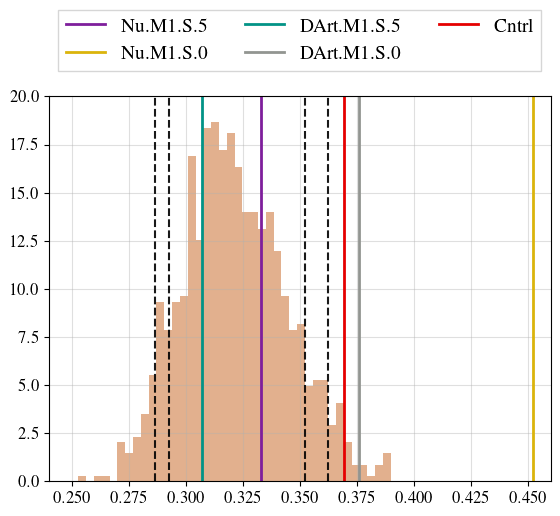

In [13]:
pattern='PNA'
C_for_obs = xr.open_dataset(out_dir+'/Patterns_'+season+'.PNA_Z500_var_OBS_spread_1980_2010.nc')
C_for_comp = xr.open_dataset(out_dir+mod_fix.split('/')[-1].split('.h0')[0]+'.'+pattern+'_Z500_ModesofVarDJF.nc')

C_for_comp[pattern+'_var_frac'][0].values
fig = plt.figure(figsize=[22,12])
ax3 = fig.add_subplot(spec[5])
ax3.hist(C_for_obs[pattern+'_var_frac'],40,density=True,color='xkcd:burnt orange',alpha=0.3)
mghi = np.max(ax3.hist(C_for_obs[pattern+'_var_frac'],40,density=True,color='xkcd:burnt orange',alpha=0.1)[0])
bhigh = np.mean(np.round(np.abs(ax3.hist(C_for_obs_fix[pattern+'_var_frac'],40,density=True,color='xkcd:burnt orange',alpha=0.1)[1]),2))
plt.grid(alpha=0.4)
plt.plot([stoch_05_PNA,stoch_05_PNA],[0,mghi+2],color='xkcd:purple',label='Nu.M1.S.5',linewidth=2)
plt.plot([stoch_00_PNA,stoch_00_PNA],[0,mghi+2],color='xkcd:gold',label='Nu.M1.S.0',linewidth=2)
plt.plot([DA_05_PNA,DA_05_PNA],[0,mghi+2],color='xkcd:teal',label='DArt.M1.S.5',linewidth=2)
plt.plot([DA_00_PNA,DA_00_PNA],[0,mghi+2],color='xkcd:gray',label='DArt.M1.S.0',linewidth=2)
plt.plot([free_PNA,free_PNA],[0,mghi+2],color='xkcd:red',label='Cntrl',linewidth=2)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=3, fancybox=False, shadow=False,fontsize=14)

perc_uhh = np.percentile(C_for_obs_fix[pattern+'_var_frac'],95)
plt.plot([perc_uhh,perc_uhh],[0,mghi+2],color='k',label='95th',alpha=0.9,linestyle='--')
perc_uhh = np.percentile(C_for_obs_fix[pattern+'_var_frac'],5)
plt.plot([perc_uhh,perc_uhh],[0,mghi+2],color='k',label='5th',alpha=0.9,linestyle='--')
perc_uhh = np.percentile(C_for_obs_fix[pattern+'_var_frac'],90)
plt.plot([perc_uhh,perc_uhh],[0,mghi+2],color='k',label='95th',alpha=0.9,linestyle='--')
perc_uhh = np.percentile(C_for_obs_fix[pattern+'_var_frac'],10)
plt.plot([perc_uhh,perc_uhh],[0,mghi+2],color='k',label='5th',alpha=0.9,linestyle='--')

tts = MaxNLocator(nbins=15).tick_values(bhigh-.15,bhigh+.15)
plt.xticks(np.round(tts,3),fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([.24,.46])
plt.ylim([0,20])
sv_nam='/Var_frac_PNA.png'
plt.savefig(sv_path+sv_nam, dpi=200,bbox_inches='tight')
plt.show()

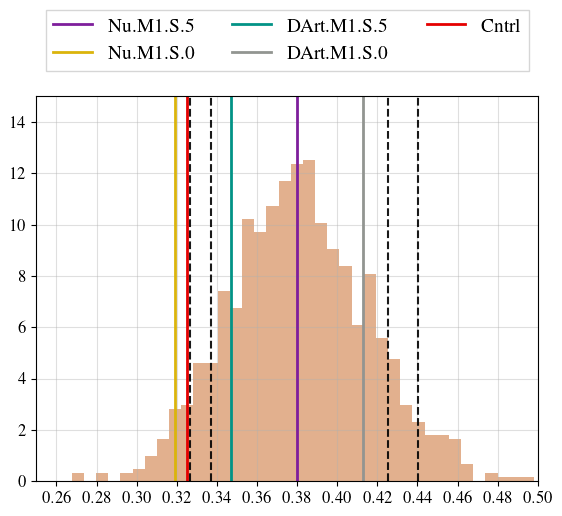

In [14]:
pattern='NAO'
C_for_obs = xr.open_dataset(out_dir+'/Patterns_'+season+'.NAO_Z500_var_OBS_spread_1980_2010.nc')
C_for_comp = xr.open_dataset(out_dir+mod_fix.split('/')[-1].split('.h0')[0]+'.'+pattern+'_Z500_ModesofVarDJF.nc')
C_for_comp[pattern+'_var_frac'][0].values
fig = plt.figure(figsize=[22,12])
ax3 = fig.add_subplot(spec[5])
ax3.hist(C_for_obs[pattern+'_var_frac'],40,density=True,color='xkcd:burnt orange',alpha=0.3)
mghi = np.max(ax3.hist(C_for_obs[pattern+'_var_frac'],40,density=True,color='xkcd:burnt orange',alpha=0.1)[0])
bhigh = np.mean(np.round(np.abs(ax3.hist(C_for_obs[pattern+'_var_frac'],40,density=True,color='xkcd:burnt orange',alpha=0.1)[1]),2))
plt.grid(alpha=0.4)
plt.plot([stoch_05_NAO,stoch_05_NAO],[0,mghi+4],color='xkcd:purple',label='Nu.M1.S.5',linewidth=2)
plt.plot([stoch_00_NAO,stoch_00_NAO],[0,mghi+4],color='xkcd:gold',label='Nu.M1.S.0',linewidth=2)
plt.plot([DA_05_NAO,DA_05_NAO],[0,mghi+4],color='xkcd:teal',label='DArt.M1.S.5',linewidth=2)
plt.plot([DA_00_NAO,DA_00_NAO],[0,mghi+4],color='xkcd:gray',label='DArt.M1.S.0',linewidth=2)
plt.plot([free_NAO,free_NAO],[0,mghi+4],color='xkcd:red',label='Cntrl',linewidth=2)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          ncol=3, fancybox=False, shadow=False,fontsize=14)

perc_uhh = np.percentile(C_for_obs[pattern+'_var_frac'],95)
plt.plot([perc_uhh,perc_uhh],[0,mghi+4],color='k',label='95th',alpha=0.9,linestyle='--')
perc_uhh = np.percentile(C_for_obs[pattern+'_var_frac'],5)
plt.plot([perc_uhh,perc_uhh],[0,mghi+4],color='k',label='5th',alpha=0.9,linestyle='--')
perc_uhh = np.percentile(C_for_obs[pattern+'_var_frac'],90)
plt.plot([perc_uhh,perc_uhh],[0,mghi+4],color='k',label='95th',alpha=0.9,linestyle='--')
perc_uhh = np.percentile(C_for_obs[pattern+'_var_frac'],10)
plt.plot([perc_uhh,perc_uhh],[0,mghi+4],color='k',label='5th',alpha=0.9,linestyle='--')

tts = MaxNLocator(nbins=15).tick_values(bhigh-.15,bhigh+.15)
plt.xticks(np.round(tts,3),fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([.25,.50])
plt.ylim([0,15])
sv_nam='/Var_frac_NAO.png'
plt.savefig(sv_path+sv_nam, dpi=200,bbox_inches='tight')
plt.show()